# 4. Linear Models for Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import classifications
import features

## 4.5 Bayesian Logistic Regression

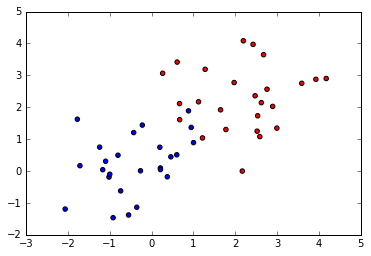

In [7]:
def create_data_set():
    x = np.random.normal(size=50).reshape(-1, 2)
    y = np.random.normal(size=50).reshape(-1, 2)
    y += np.array([2., 2.])
    return (np.concatenate([x, y]), np.concatenate([np.zeros(25), np.ones(25)]))

x, labels = create_data_set()
x1_test, x2_test = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100))
x_test = np.array([x1_test, x2_test]).transpose(1, 2, 0).reshape(-1, 2)

feature = features.Polynomial(1)
X = feature.transform(x)
X_test = feature.transform(x_test)

colors = ['blue', 'red']
plt.scatter(x[:, 0], x[:, 1], c=[colors[int(label)] for label in labels])

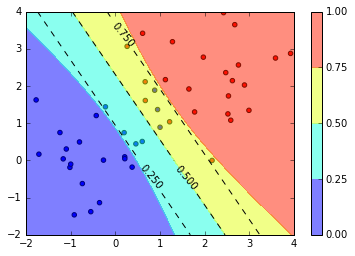

In [18]:
model = classifications.BayesianLogisticRegression(alpha=0.1)

model.fit(X, labels)

probs = model.predict_proba(X_test)
dists = model.predict_dist(X_test)

levels = np.linspace(0, 1, 5)
plt.scatter(x[:, 0], x[:, 1], c=[colors[int(label)] for label in labels])
cp = plt.contour(x1_test, x2_test, probs.reshape(100, 100), levels, colors='k', linestyles='dashed')
plt.clabel(cp, inline=True, fontsize=10)
plt.contourf(x1_test, x2_test, dists.reshape(100, 100), levels, alpha=0.5)
plt.colorbar()
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.show()